## Data Preprocessing

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Definisikan path dataset 
data = pd.read_csv('/content/gdrive/My Drive/ADSB/Final Test/train.csv')

In [0]:
data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
data.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077582,8.641821,1.300904,0.006283,2.142958,0.361469,1.209326,2.007427,5.835840,2.883666,1.027180,1.409188,1.038531,1.727606,1.055792,2.146983,1.958707,0.001733,1.901989,2.048484,2.419360,2.686230,0.474550,0.497737,0.444890,0.484635,7.962172,253.987100,2.102171,...,0.036459,0.058015,0.010003,0.005962,0.007848,0.190465,0.012715,0.009161,0.007494,0.009296,0.008134,0.014601,0.037167,0.097775,0.018895,0.089456,0.013439,0.011856,0.014937,0.011755,0.025042,0.010896,0.021168,0.022836,0.020646,0.006938,0.010407,0.066587,0.006837,0.013658,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,0.255974
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,0.122213,0.082347,4.227082,0.715034,0.032816,0.350033,0.349551,0.417939,0.085858,2.674536,0.320627,0.231566,0.491688,0.274915,0.445195,0.329328,0.989139,0.945739,0.007338,0.971223,0.755149,0.509577,0.483159,0.154959,0.140187,0.163012,0.129200,13.027697,178.621154,0.303098,...,0.187432,0.233774,0.099515,0.076981,0.088239,0.392671,0.112040,0.095275,0.086244,0.095967,0.089821,0.119949,0.189172,0.297013,0.136155,0.285404,0.115145,0.108237,0.121304,0.107780,0.156253,0.103813,0.143947,0.149380,0.142198,0.083007,0.101485,0.249307,0.082405,0.116066,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,0.436411
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.

In [0]:
# Check jumlah data
data["Response"].value_counts()

0    44181
1    15200
Name: Response, dtype: int64

In [0]:
# Handling missing value
def missing_value(df):
    #count the number of missing value 
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False)
    missing  = pd.concat([total, percent], axis=1, keys=['Total_Missing', 'Percent(%)'])
    
    return missing.head(20)

In [0]:
missing_value(data)

,Total_Missing,Percent(%)
Medical_History_10,58824,99.06
Medical_History_32,58274,98.14
Medical_History_24,55580,93.60
Medical_History_15,44596,75.10
Family_Hist_5,41811,70.41
Family_Hist_3,34241,57.66
Family_Hist_2,28656,48.26
Insurance_History_5,25396,42.77
Family_Hist_4,19184,32.31
Employment_Info_6,10854,18.28


In [0]:
#Drop columns yang missing valuenya lebih dari threshold
missing_values=round(data.isnull().sum()/len(data),2)
missing_values=missing_values[missing_values>0.1]
for i in missing_values.index:
  data=data.drop(i,axis=1)

In [0]:
# Isi nilai kolom yang kosong
data["Employment_Info_1"] = data["Employment_Info_1"].fillna(data["Employment_Info_1"].mean())

In [0]:
missing_value(data)

,Total_Missing,Percent(%)
Response,0,0.0
Medical_History_14,0,0.0
Family_Hist_1,0,0.0
Medical_History_2,0,0.0
Medical_History_3,0,0.0
Medical_History_4,0,0.0
Medical_History_5,0,0.0
Medical_History_6,0,0.0
Medical_History_7,0,0.0
Medical_History_8,0,0.0


In [0]:
data=data.drop(["Product_Info_2"],axis=1)

In [0]:
df_train_clean=data.copy()

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_train_clean=pd.DataFrame(scaler.fit_transform(df_train_clean),columns=data.columns)

In [0]:
medical_keyword_cols=[col for col in df_train_clean.columns if str(col).startswith("Medical_Keyword")]
medical_cols=[col for col in df_train_clean.columns if str(col).startswith("Medical_History")]
product_info_cols =[col for col in df_train_clean.columns if str(col).startswith("Product_Info")]
employment_info_cols=[col for col in df_train_clean.columns if str(col).startswith("Employment_Info")]
insured_info_cols =[col for col in df_train_clean.columns if str(col).startswith("InsuredInfo")]
insured_history_cols=[col for col in df_train_clean.columns if str(col).startswith("Insurance_History")]
family_history_cols =[col for col in df_train_clean.columns if str(col).startswith("Family_Hist")]

df_train_clean['Total_Medical_Keyword']=df_train_clean[medical_keyword_cols].sum(axis=1)
df_train_clean['Total_Medical_History']=df_train_clean[medical_cols].sum(axis=1)
df_train_clean['Total_Product_Info']=df_train_clean[product_info_cols].sum(axis=1)
df_train_clean['Total_Employment_Info']=df_train_clean[employment_info_cols].sum(axis=1)
df_train_clean['Total_InsuredInfo']=df_train_clean[insured_info_cols].sum(axis=1)
df_train_clean['Total_Insurance_History']=df_train_clean[insured_history_cols].sum(axis=1)
df_train_clean['Total_Family_Hist']=df_train_clean[family_history_cols].sum(axis=1)

In [0]:
data1=df_train_clean[["Ins_Age","Ht","Wt","BMI","Total_Medical_Keyword","Total_Medical_History","Total_Product_Info","Total_Employment_Info",
                      "Total_InsuredInfo","Total_Insurance_History","Total_Family_Hist","Response"]]

In [0]:
data1=pd.DataFrame(scaler.fit_transform(data1),columns=data1.columns)

In [0]:
data1.head()

,Ins_Age,Ht,Wt,BMI,Total_Medical_Keyword,Total_Medical_History,Total_Product_Info,Total_Employment_Info,Total_InsuredInfo,Total_Insurance_History,Total_Family_Hist,Response
0,0.641791,0.581818,0.148536,0.323008,0.0000,0.583586,0.049027,0.431523,0.438596,0.166667,0.5,0.0
1,0.059701,0.600000,0.131799,0.272288,0.0000,0.462823,0.342760,0.321101,0.438596,0.500000,0.5,1.0
2,0.029851,0.745455,0.288703,0.428780,0.0000,0.648949,0.342760,0.065229,0.298246,0.666667,1.0,0.0
3,0.164179,0.672727,0.205021,0.352438,0.0625,0.691107,0.338212,0.408752,0.561404,0.666667,1.0,0.0
4,0.417910,0.654545,0.234310,0.424046,0.0000,0.668266,0.374307,0.064211,0.438596,0.666667,0.5,0.0


In [0]:
y=data1['Response']
X=data1.drop('Response',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
from xgboost import XGBClassifier
XGB=XGBClassifier()
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_train1 = XGB.predict(X_train)
y_pred_test1  = XGB.predict(X_test)

In [0]:
print("Accuracy Train: ", round(accuracy_score(y_pred_train1,y_train)*100,2))
print("Accuracy Test: ", round(accuracy_score(y_pred_test1,y_test)*100,2))
print("Classification Report: \n",classification_report(y_pred_test1,y_test))
print("Confusion Matrix: \n",confusion_matrix(y_pred_test1,y_test))

Accuracy Train:  78.0
Accuracy Test:  77.26
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.78      0.86     16157
         1.0       0.24      0.66      0.35      1658

    accuracy                           0.77     17815
   macro avg       0.60      0.72      0.61     17815
weighted avg       0.89      0.77      0.81     17815

Confusion Matrix: 
 [[12675  3482]
 [  570  1088]]


In [0]:
from lightgbm import LGBMClassifier
LGBM=LGBMClassifier()
LGBM.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
y_pred_train2 = LGBM.predict(X_train)
y_pred_test2  = LGBM.predict(X_test)

In [0]:
print("Accuracy Train: ", round(accuracy_score(y_pred_train2,y_train)*100,2))
print("Accuracy Test: ", round(accuracy_score(y_pred_test2,y_test)*100,2))
print("Classification Report: \n",classification_report(y_pred_test2,y_test))
print("Confusion Matrix: \n",confusion_matrix(y_pred_test2,y_test))

Accuracy Train:  79.88
Accuracy Test:  77.19
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.79      0.86     15934
         1.0       0.26      0.63      0.37      1881

    accuracy                           0.77     17815
   macro avg       0.60      0.71      0.62     17815
weighted avg       0.88      0.77      0.81     17815

Confusion Matrix: 
 [[12558  3376]
 [  687  1194]]


In [0]:
from sklearn.ensemble.forest import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred_train3 = RF.predict(X_train)
y_pred_test3  = RF.predict(X_test)

In [0]:
print("Accuracy Train: ", round(accuracy_score(y_pred_train3,y_train)*100,2))
print("Accuracy Test: ", round(accuracy_score(y_pred_test3,y_test)*100,2))
print("Classification Report: \n",classification_report(y_pred_test3,y_test))
print("Confusion Matrix: \n",confusion_matrix(y_pred_test3,y_test))

Accuracy Train:  97.87
Accuracy Test:  75.63
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.93      0.78      0.85     15835
         1.0       0.24      0.56      0.34      1980

    accuracy                           0.76     17815
   macro avg       0.59      0.67      0.59     17815
weighted avg       0.86      0.76      0.79     17815

Confusion Matrix: 
 [[12369  3466]
 [  876  1104]]


In [0]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
lr.fit(X_train, y_train)

LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_train4 = lr.predict(X_train)
y_pred_test4  = lr.predict(X_test)

In [0]:
print("Accuracy Train: ", round(accuracy_score(y_pred_train4,y_train)*100,2))
print("Accuracy Test: ", round(accuracy_score(y_pred_test4,y_test)*100,2))
print("Classification Report: \n",classification_report(y_pred_test4,y_test))
print("Confusion Matrix: \n",confusion_matrix(y_pred_test4,y_test))

Accuracy Train:  76.4
Accuracy Test:  76.32
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.78      0.86     16232
         1.0       0.21      0.61      0.31      1583

    accuracy                           0.76     17815
   macro avg       0.58      0.69      0.59     17815
weighted avg       0.89      0.76      0.81     17815

Confusion Matrix: 
 [[12629  3603]
 [  616   967]]


In [0]:
!pip install scorecardpy

[INFO] filtering variables ...
Variable filtering on 59381 rows and 12 columns in 00:00:15 
1 variables are removed
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...


/usr/local/lib/python3.6/dist-packages/scorecardpy/perf.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ], ignore_index=True)


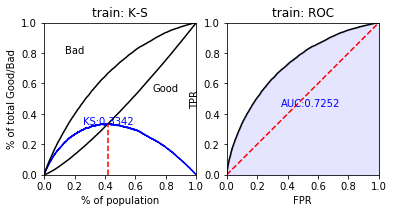

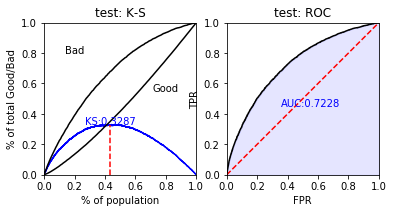

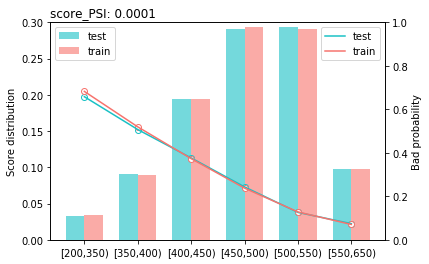

{'pic': {'score': <Figure size 432x288 with 2 Axes>},
 'psi':   variable       PSI
 0    score  0.000112}

In [0]:
data_s = data1.copy()
#data_s = pd.get_dummies(data_s)

# Traditional Credit Scoring Using Logistic Regression


import scorecardpy as sc

# data prepare ------
# load germancredit data
dat = data_s.copy()

# filter variable via missing rate, iv, identical value rate
dt_s = sc.var_filter(dat, y="Response")

# breaking dt into train and test
train, test = sc.split_df(dt_s, 'Response').values()
#majority=train[train["Target"]==0]
#minority=train[train["Target"]==1]
#ind = np.arange(majority.shape[0])
#np.random.shuffle(ind)
#train1 = majority.iloc[ind[:int(len(minority)+1000)],:]
#train = train1.append(minority)

# woe binning ------
bins = sc.woebin(dt_s, y="Response")
# sc.woebin_plot(bins)

# binning adjustment
# # adjust breaks interactively
# breaks_adj = sc.woebin_adj(dt_s, "creditability", bins) 
# # or specify breaks manually
# breaks_adj = {
#     'age.in.years': [26, 35, 40],
#     'other.debtors.or.guarantors': ["none", "co-applicant%,%guarantor"]
# }
# bins_adj = sc.woebin(dt_s, y="creditability", breaks_list=breaks_adj)

# converting train and test into woe values
train_woe = sc.woebin_ply(train,bins)
test_woe = sc.woebin_ply(test,bins)

y_train = train_woe.loc[:,'Response']
X_train = train_woe.loc[:,train_woe.columns != 'Response']
y_test = test_woe.loc[:,'Response']
X_test = test_woe.loc[:,train_woe.columns != 'Response']
#y_train1 = train_woe.loc[:,'Target']
#X_train1 = train_woe.loc[:,train_woe.columns != 'Target']
#X_columns=list(X_train1)
#from imblearn.over_sampling import SMOTE # Handling imbalance data
# Resampling data with smote
#sm = SMOTE(random_state=42)
#X_train2, y_train2 = sm.fit_resample(X_train1, y_train1)
#X_train = pd.DataFrame(X_train2,columns=X_columns)
#y_train = y_train2

# logistic regression ------
from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr=LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
lr.fit(X_train, y_train)
# lr.coef_
# lr.intercept_

# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]
#THRESHOLD = 0.3
#train_pred = np.where(lr.predict_proba(X_train)[:,1] > THRESHOLD, 1, 0)
#test_pred = np.where(lr.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)


# performance ks & roc ------
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

# score ------
card = sc.scorecard(bins, lr, X_train.columns)
# credit score
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

# psi
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

In [0]:
a = pd.DataFrame()
for i in card:
  b = pd.DataFrame(card[i])
  a = a.append(b)
a

,variable,bin,points
0,basepoints,NaN,465.0
0,Total_Employment_Info,"[-inf,0.2)",3.0
1,Total_Employment_Info,"[0.2,0.4)",-22.0
2,Total_Employment_Info,"[0.4,0.5)",14.0
3,Total_Employment_Info,"[0.5,inf)",-1.0
4,Total_Medical_Keyword,"[-inf,0.0625)",23.0
5,Total_Medical_Keyword,"[0.0625,0.125)",2.0
6,Total_Medical_Keyword,"[0.125,0.25)",-16.0
7,Total_Medical_Keyword,"[0.25,inf)",-37.0
8,Ins_Age,"[-inf,0.4)",9.0


In [0]:
#THRESHOLD = 0.3
#y_pred_train = np.where(lr.predict_proba(X_train)[:,1] > THRESHOLD, 1, 0)
#y_pred_test = np.where(lr.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
y_pred_train = lr.predict(X_train)
y_pred_test  = lr.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,precision_recall_curve,accuracy_score
print("Accuracy Train: ", round(accuracy_score(y_pred_train,y_train)*100,2))
print("Accuracy Test: ", round(accuracy_score(y_pred_test,y_test)*100,2))
print("Classification Report: \n",classification_report(y_pred_test,y_test))
print("Confusion Matrix: \n",confusion_matrix(y_pred_test,y_test))

Accuracy Train:  76.79
Accuracy Test:  76.54
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.78      0.86     16144
           1       0.22      0.61      0.33      1670

    accuracy                           0.77     17814
   macro avg       0.59      0.70      0.59     17814
weighted avg       0.88      0.77      0.81     17814

Confusion Matrix: 
 [[12609  3535]
 [  645  1025]]
